# CAR PRICE PREDICTION END TO END MODEL

# IMPORTING LIBRARIES

In [499]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Stastics
from scipy import stats as st
import pylab

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostRegressor
from sklearn.linear_model import Perceptron
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix , r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [500]:
df=pd.read_csv("car data.csv")

In [501]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [502]:
df.shape

(301, 9)

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [504]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [505]:
df.describe(include=object)

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [506]:
df.describe(include=float)

,Selling_Price,Present_Price
count,301.000000,301.000000
mean,4.661296,7.628472
std,5.082812,8.644115
min,0.100000,0.320000
25%,0.900000,1.200000
50%,3.600000,6.400000
75%,6.000000,9.900000
max,35.000000,92.600000


In [507]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [508]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [509]:
# checking unique values for categorical features

In [510]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [511]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [512]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [513]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

<AxesSubplot:>

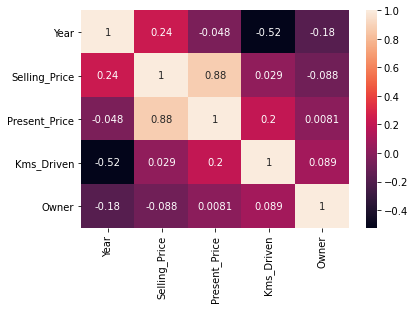

In [514]:
sns.heatmap(df.corr(),annot=True)

In [515]:
# EDA
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


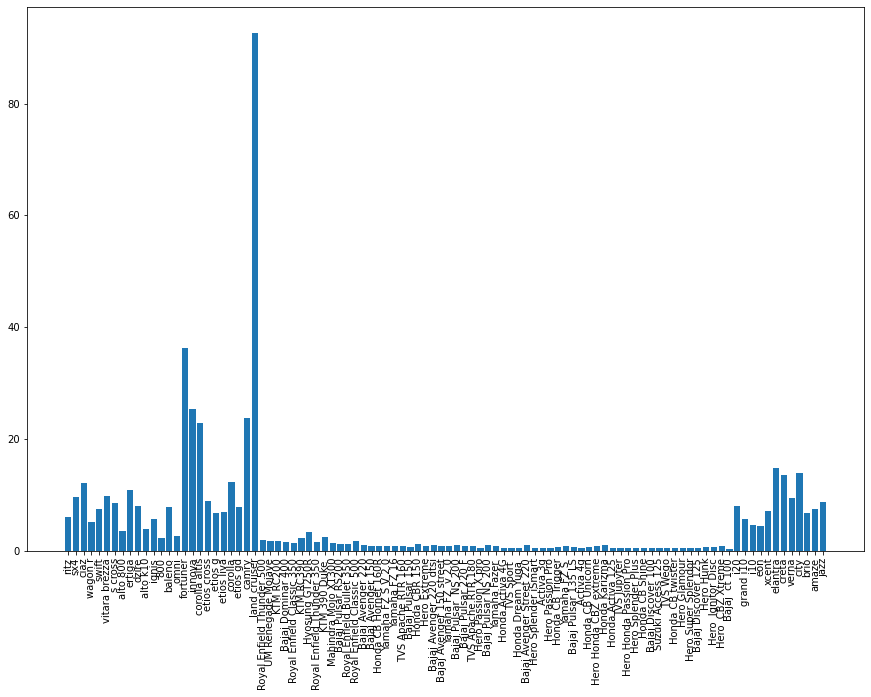

In [516]:
plt.figure(figsize=(15,10))
plt.bar(df['Car_Name'],df['Present_Price'])
plt.xticks(rotation=90)
plt.show()

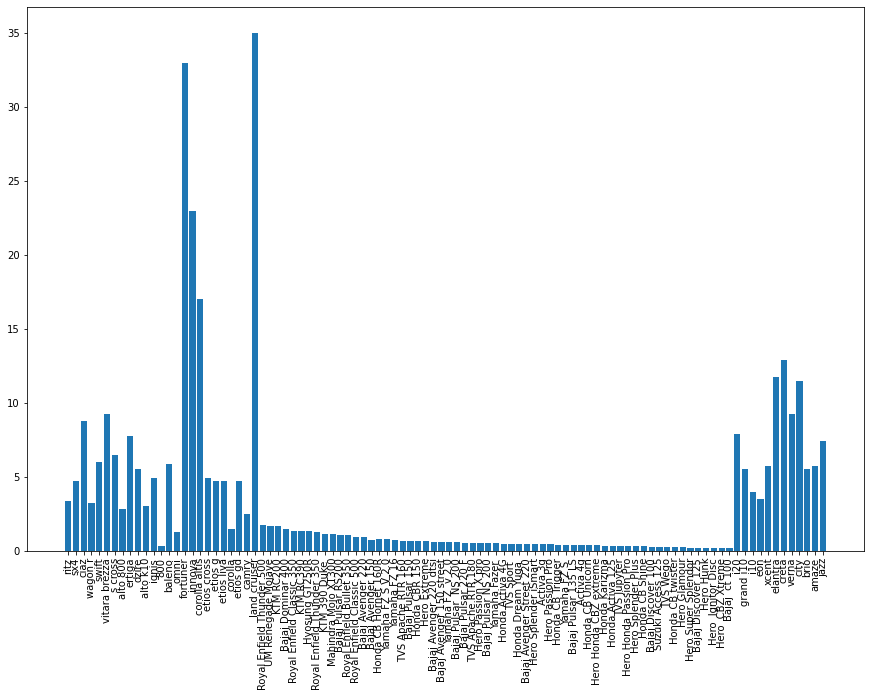

In [517]:
plt.figure(figsize=(15,10))
plt.bar(df['Car_Name'],df['Selling_Price'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Transmission', ylabel='count'>

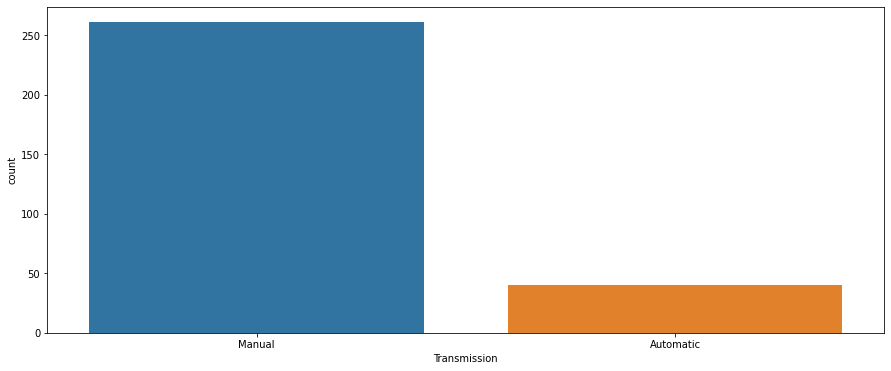

In [518]:
plt.figure(figsize=(15,6))
sns.countplot(df['Transmission'])

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

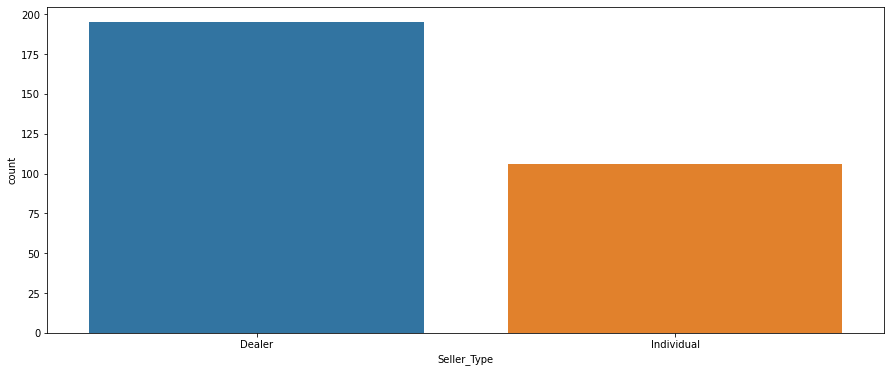

In [519]:
plt.figure(figsize=(15,6))
sns.countplot(df['Seller_Type'])

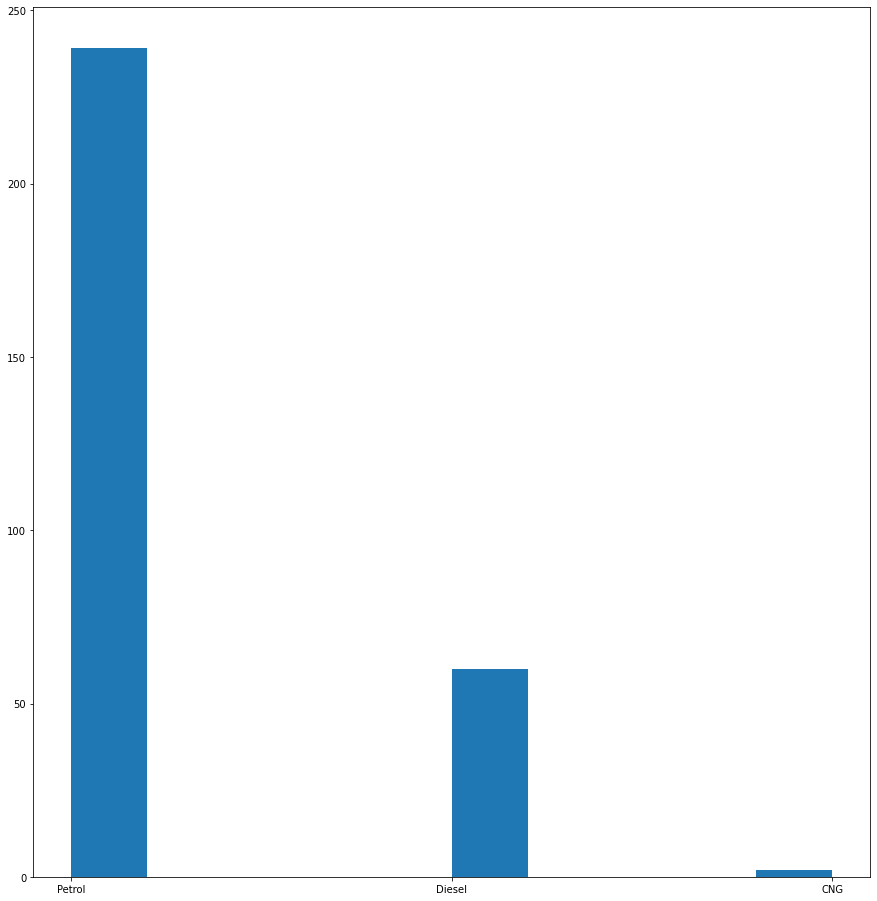

In [520]:
plt.figure(figsize=(15,16))
plt.hist(df['Fuel_Type'])
plt.show()

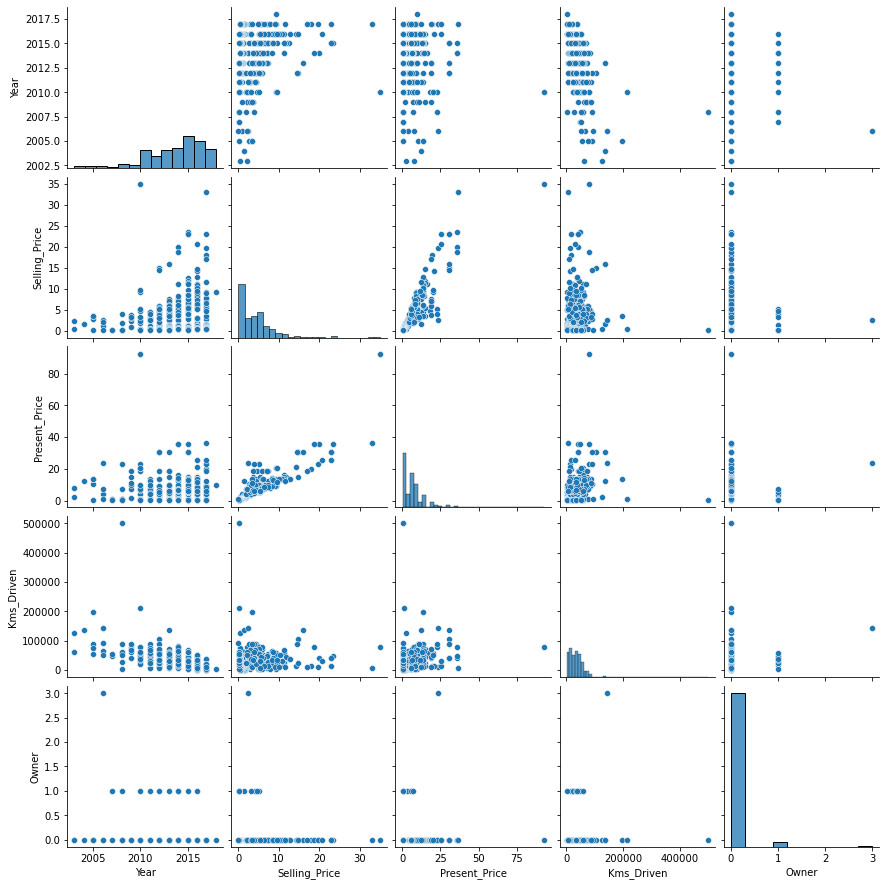

In [521]:
sns.pairplot(df)

In [522]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [523]:
# so there is no use of car name so we drop it

In [524]:
df.drop(columns=['Car_Name'],inplace=True)

In [525]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [526]:
# Feature engineering

In [527]:
final_data=df

In [528]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [529]:
final_data['Current_Year']=2020

In [530]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [531]:
# we added a new feature called current_year so we can easily calculate how much the car is old

In [532]:
# by sub current_year-Year

In [533]:
# NOW WE FIND THE AGE OF THE CAR

In [534]:
final_data['Car_Age']=final_data['Current_Year']-final_data['Year']

In [535]:
final_data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [536]:
final_data=df

In [537]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [538]:
# Now there is no use of feature['Year','Current_Year'] so drop them

In [539]:
df.drop(columns=['Year','Current_Year'],inplace=True)

In [540]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [541]:
# one hot encoding

In [542]:
df=pd.get_dummies(df)

In [543]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [544]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,6,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,5,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,11,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,3,0,1,0,1,0,0,1


In [545]:
# Now your data is ready for Macine Learning

 finding independent and dependent for algo 

In [546]:
x=df.drop(columns=['Selling_Price'])
y=df['Selling_Price']

In [547]:
x

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,6,0,0,1,1,0,0,1
1,9.54,43000,0,7,0,1,0,1,0,0,1
2,9.85,6900,0,3,0,0,1,1,0,0,1
3,4.15,5200,0,9,0,0,1,1,0,0,1
4,6.87,42450,0,6,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,11.60,33988,0,4,0,1,0,1,0,0,1
297,5.90,60000,0,5,0,0,1,1,0,0,1
298,11.00,87934,0,11,0,0,1,1,0,0,1
299,12.50,9000,0,3,0,1,0,1,0,0,1


In [548]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Feature Scaling

In [549]:
scaler=StandardScaler()

In [550]:
x_scaled=scaler.fit_transform(x)

splitting them into train and test data for Unscaled_data

In [551]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

splitting them into train and test data for scaled_data

In [552]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.2,random_state=40)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building For Scaled Data
</p>
</div>

In [553]:
training_score=[]
testing_score=[]

In [554]:
lr=LinearRegression()

In [555]:
lr.fit(x_train1,y_train1)

LinearRegression()

In [556]:
y_pred=lr.predict(x_test1)

In [557]:
y_pred_train=lr.predict(x_train1)

In [558]:
r2_score(y_pred,y_test1)

0.8786614010029762

In [559]:
r2_score(y_pred_train,y_train1)

0.8640185461991747

In [560]:
def scaled_model(model):
    model.fit(x_train1,y_train1)
    y_pred=model.predict(x_test1)
    y_pred_train=model.predict(x_train1)
    a=r2_score(y_pred,y_test1)*100
    b=r2_score(y_pred_train,y_train1)*100
    a.astype(int)
    b.astype(int)
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"mean_squared_error of {model} model is:",mean_squared_error(y_test1,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"mean_absolute_error of {model} model is:",mean_absolute_error(y_test1,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"rmse {model} model is:",0.5**mean_squared_error(y_test1,y_pred))
    print("\n------------------------------------------------------------------------")

Linear Regression()

In [561]:
scaled_model(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 87.86614010029761
r2_Score of LinearRegression() model on Testing Data is: 86.40185461991747

------------------------------------------------------------------------
mean_squared_error of LinearRegression() model is: 2.042792173457076

------------------------------------------------------------------------
mean_absolute_error of LinearRegression() model is: 1.091689740375756

------------------------------------------------------------------------
rmse LinearRegression() model is: 0.24269357599753164

------------------------------------------------------------------------


KNN

In [562]:
scaled_model(KNeighborsRegressor())

r2_Score of KNeighborsRegressor() model on Training Data is: 93.90222037464487
r2_Score of KNeighborsRegressor() model on Testing Data is: 91.35592338906491

------------------------------------------------------------------------
mean_squared_error of KNeighborsRegressor() model is: 1.1166935081967215

------------------------------------------------------------------------
mean_absolute_error of KNeighborsRegressor() model is: 0.6636065573770491

------------------------------------------------------------------------
rmse KNeighborsRegressor() model is: 0.4611495169660373

------------------------------------------------------------------------


SVM

In [563]:
scaled_model(SVR())

r2_Score of SVR() model on Training Data is: 60.55463387734594
r2_Score of SVR() model on Testing Data is: 5.1611211598467825

------------------------------------------------------------------------
mean_squared_error of SVR() model is: 3.1235312650936216

------------------------------------------------------------------------
mean_absolute_error of SVR() model is: 0.8875193829684224

------------------------------------------------------------------------
rmse SVR() model is: 0.1147422592548995

------------------------------------------------------------------------


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building For UnScaled Data
</p>
</div>

In [565]:
def Unscaled_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    a=r2_score(y_pred,y_test)*100
    b=r2_score(y_pred_train,y_train)*100
    a.astype(int)
    b.astype(int)
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"mean_squared_error of {model} model is:",mean_squared_error(y_test,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"mean_absolute_error of {model} model is:",mean_absolute_error(y_test,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"rmse {model} model is:",0.5**mean_squared_error(y_test,y_pred))
    print("\n------------------------------------------------------------------------")

Rnadom Forest

In [566]:
Unscaled_model(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 97.125182453214
r2_Score of RandomForestRegressor() model on Testing Data is: 98.72863291561387

------------------------------------------------------------------------
mean_squared_error of RandomForestRegressor() model is: 0.4870925134426236

------------------------------------------------------------------------
mean_absolute_error of RandomForestRegressor() model is: 0.45377049180327916

------------------------------------------------------------------------
rmse RandomForestRegressor() model is: 0.7134615003651377

------------------------------------------------------------------------


Decision Tree

In [577]:
Unscaled_model(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 95.21871284399882
r2_Score of DecisionTreeRegressor() model on Testing Data is: 100.0

------------------------------------------------------------------------
mean_squared_error of DecisionTreeRegressor() model is: 0.9417934426229507

------------------------------------------------------------------------
mean_absolute_error of DecisionTreeRegressor() model is: 0.5927868852459017

------------------------------------------------------------------------
rmse DecisionTreeRegressor() model is: 0.5205853281357673

------------------------------------------------------------------------


Ada Boosting

In [568]:
Unscaled_model(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 93.94255553152315
r2_Score of AdaBoostRegressor() model on Testing Data is: 96.00790176551709

------------------------------------------------------------------------
mean_squared_error of AdaBoostRegressor() model is: 0.943067837854807

------------------------------------------------------------------------
mean_absolute_error of AdaBoostRegressor() model is: 0.734966380049391

------------------------------------------------------------------------
rmse AdaBoostRegressor() model is: 0.5201256755352563

------------------------------------------------------------------------


Gradient Boosting

In [569]:
Unscaled_model(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 98.02818791379974
r2_Score of GradientBoostingRegressor() model on Testing Data is: 99.61960616415399

------------------------------------------------------------------------
mean_squared_error of GradientBoostingRegressor() model is: 0.33492351517813146

------------------------------------------------------------------------
mean_absolute_error of GradientBoostingRegressor() model is: 0.39100110195627136

------------------------------------------------------------------------
rmse GradientBoostingRegressor() model is: 0.7928261673645973

------------------------------------------------------------------------


In [570]:
Unscaled_model(LGBMRegressor())

r2_Score of LGBMRegressor() model on Training Data is: 94.94591632443883
r2_Score of LGBMRegressor() model on Testing Data is: 85.54393036449267

------------------------------------------------------------------------
mean_squared_error of LGBMRegressor() model is: 0.8522612639841278

------------------------------------------------------------------------
mean_absolute_error of LGBMRegressor() model is: 0.5719068585457266

------------------------------------------------------------------------
rmse LGBMRegressor() model is: 0.5539158537931711

------------------------------------------------------------------------


XG boosting

In [571]:
Unscaled_model(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 96.19800779238096
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [572]:
Unscaled_model(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x000002110AF67A30> model on Training Data is: 95.0014307946532
r2_Score of <catboost.core.CatBoostRegressor object at 0x000002110AF67A30> model on Testing Data is: 99.86158227484728

------------------------------------------------------------------------
mean_squared_error of <catboost.core.CatBoostRegressor object at 0x000002110AF67A30> model is: 0.7487428539896609

------------------------------------------------------------------------
mean_absolute_error of <catboost.core.CatBoostRegressor object at 0x000002110AF67A30> model is: 0.47357732800600477

------------------------------------------------------------------------
rmse <catboost.core.CatBoostRegressor object at 0x000002110AF67A30> model is: 0.5951219132494304

------------------------------------------------------------------------


In [573]:
Models = ["Linear Regression","KNN","SVM","Random Forest","Ada Boost",
          "Gradient Boost","LGBM","XGBoost","CatBoost"]

In [574]:
df=pd.DataFrame({"Algorithms":Models,"Training Score":training_score,"Testing Score": testing_score})

In [575]:
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,87.866140,86.401855
1,KNN,93.902220,91.355923
2,SVM,60.554634,5.161121
3,Random Forest,97.125182,98.728633
4,Ada Boost,93.942556,96.007902
5,Gradient Boost,98.028188,99.619606
6,LGBM,94.945916,85.543930
7,XGBoost,96.198008,99.999075
8,CatBoost,95.001431,99.861582


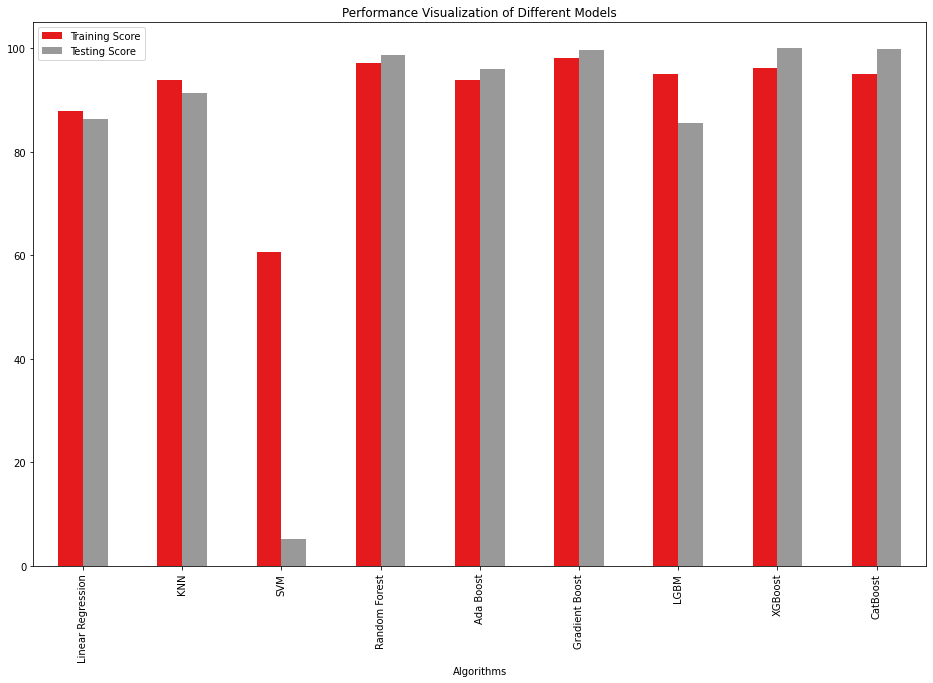

In [576]:
df.plot(x='Algorithms',y=['Training Score','Testing Score'],colormap='Set1',figsize=(16,10),kind="bar", title="Performance Visualization of Different Models");